# Linear Regression Model : For Housing Dataset

INTRODUCTION: Our aim is to predict the estimate price for a house by applying Machine learning(Linear Regression).Our dataset includes features which affects the price of house such as Area(in sq. feets),no of bathrooms,bedrooms,stories,parking,guestrooms,it's location like whether it's located on mainroad or not,facilities like airconditioning,hotwaterheating,whether the house is furnished or not,pref area etc.

### Importing packages and modules:

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#import pandas and numpy package
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Normalize time series data
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection

### Reading data from csv file:

In [3]:
housingDS = pd.read_csv("C:\\Users\\This PC\\Downloads\\Housing.csv")

## Data Inspection:

In [4]:
housingDS.shape
#(rows,columns in datasets)

(545, 13)

In [5]:
housingDS.info()
#Columns,Dataentries,datatypes,whether they are null or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housingDS.describe()
#Calculating statistical data like percentile,mean,std of dataframe

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Cleaning

In [7]:
#check null values
housingDS.isnull().sum()*100/housingDS.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

It shows that there are no NULL values in the dataset,hence it's clean.

## Graphs and plots:


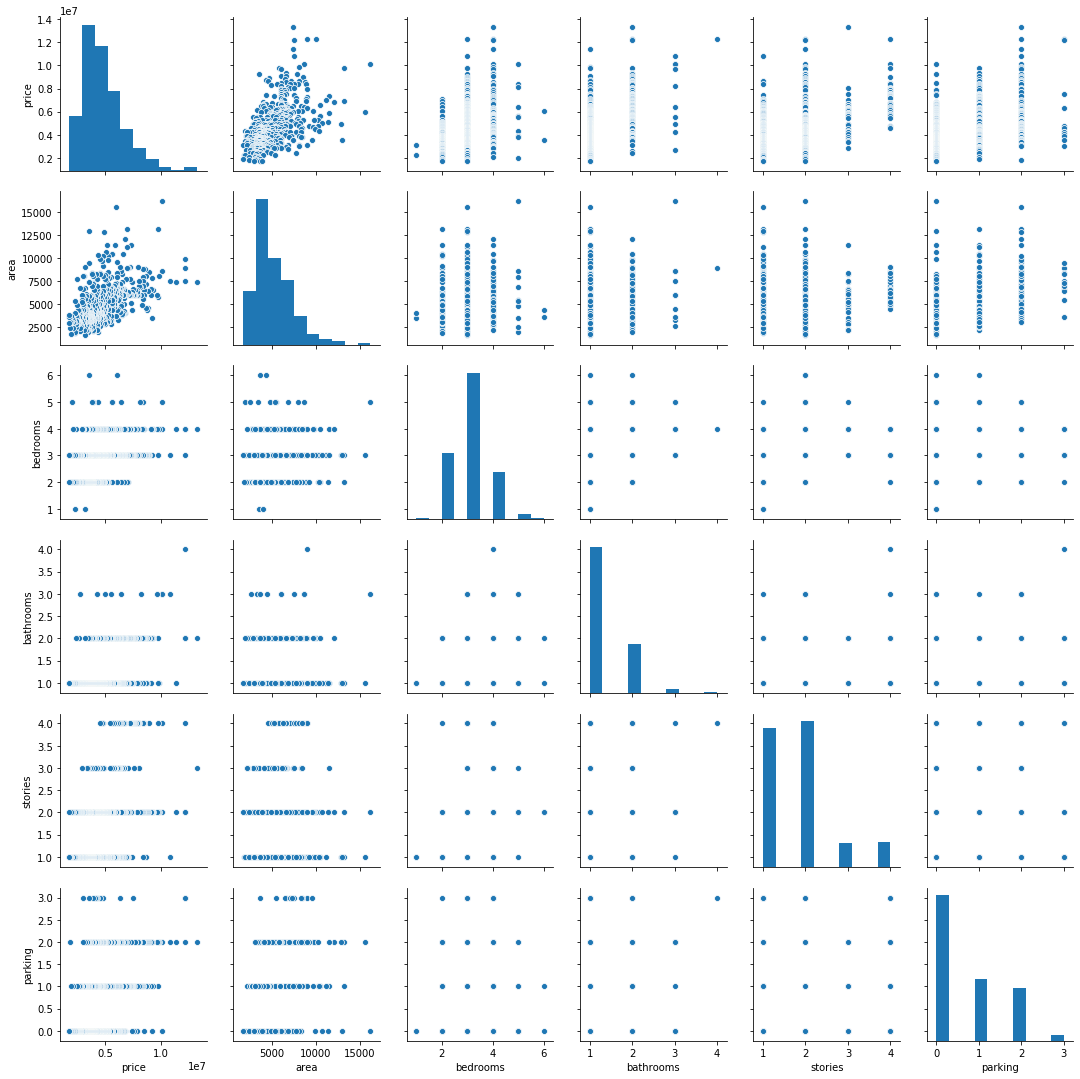

In [8]:
seabornInstance.pairplot(housingDS)
plt.show()

We have visualised the numeric variables.We can clearly observe there are some categorial variables as well,also Area seems to be the positively correlated with price,while other graphs are very random and discrete in nature.

#### Let's check the correaltion coefficient to see which variables are highly correlated

# HeatMap

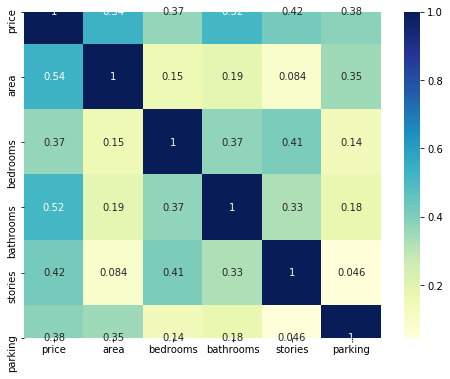

In [9]:
plt.figure(figsize=(8,6))
seabornInstance.heatmap(housingDS.corr(),annot=True,cmap="YlGnBu")
plt.show()


Clearly,HeatMap helps you visualizing the concentration in 2D manner.
From the above heatmap, area seems to be correlated to price the most.
After that we have no of bathrooms,stories,parking as well as bedrooms affecting the price of a house.


### Area vs Price Plot


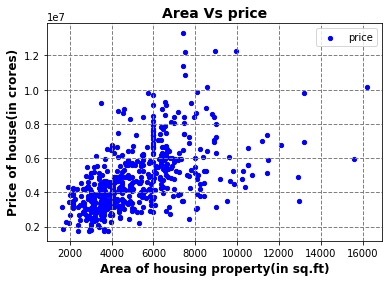

In [10]:
x=housingDS.area
y=housingDS.price
plt.scatter(x,y,c='blue',s=18)
plt.title('Area Vs price',fontweight='bold',fontsize=14)
plt.xlabel('Area of housing property(in sq.ft)',fontweight='bold',fontsize=12)
plt.ylabel('Price of house(in crores)',fontweight='bold',fontsize=12)
plt.legend(['price'])
plt.grid(color='gray',linestyle='--',linewidth=1)
plt.show()

From the above graph,we can observe that area is positively correlated to price,as area increases ,the price of the house also increases,however there are some houses which have huge prices for less area.These are the datapoints which deviates us,known as outliers.Okay,Let's remove them!


### Checking the Distribution of the function

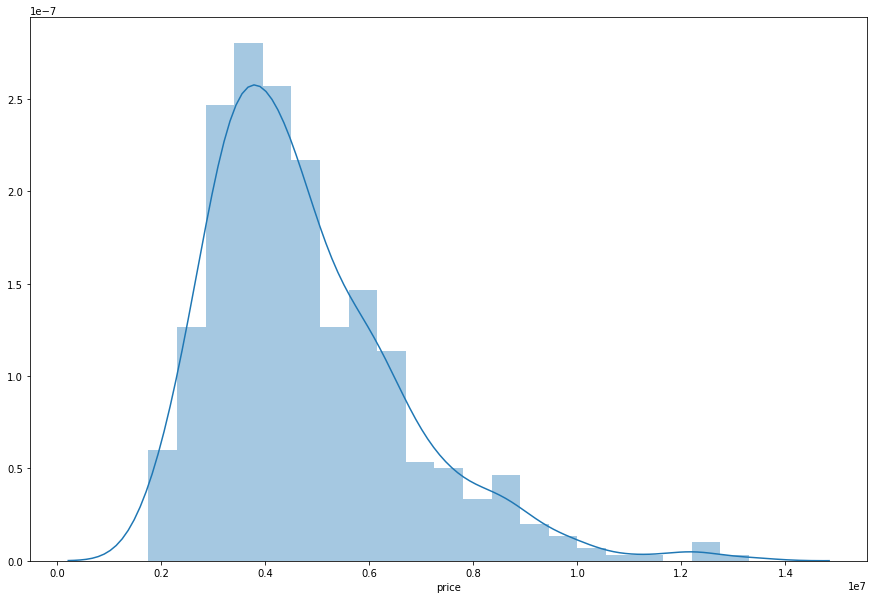

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(housingDS['price'])
plt.show()

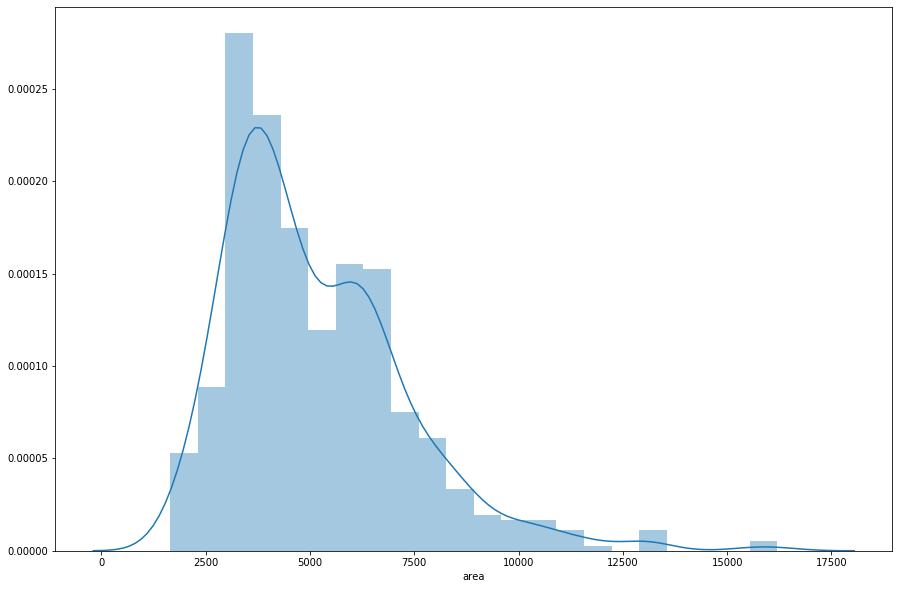

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(housingDS['area'])
plt.show()

Shape of curve is more directed towards right and not only at center(normally distributed),hence it's Right skewed in nature.

## OUTLIER ANALYSIS

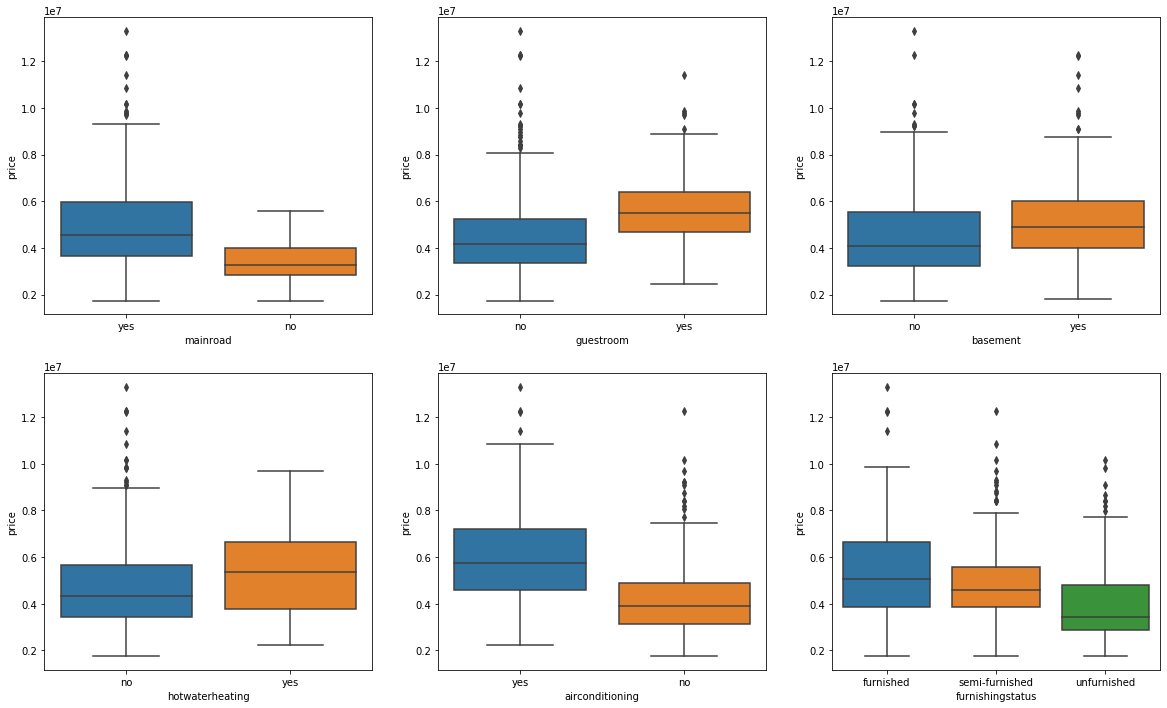

In [11]:
#BOXPLOTS:
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housingDS)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housingDS)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housingDS)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housingDS)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housingDS)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housingDS)
plt.show()

#Outliers are observed,these are extreme values that deviate from other observations on data,here price are getting 
#higher due to the presence of these outliers.It also tells us the skewness of data.

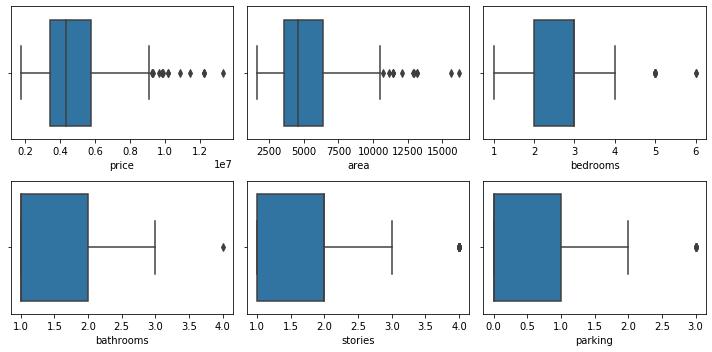

In [12]:
# Outlier Detection
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = seabornInstance.boxplot(housingDS['price'], ax = axs[0,0])
plt2 = seabornInstance.boxplot(housingDS['area'], ax = axs[0,1])
plt3 = seabornInstance.boxplot(housingDS['bedrooms'], ax = axs[0,2])
plt1 = seabornInstance.boxplot(housingDS['bathrooms'], ax = axs[1,0])
plt2 = seabornInstance.boxplot(housingDS['stories'], ax = axs[1,1])
plt3 = seabornInstance.boxplot(housingDS['parking'], ax = axs[1,2])

plt.tight_layout()

#In Univariant Boxplots we can clearly see,the points which are out of atleast 1.5 times the interquartile
#range is an outlier.So we need to remove these outliers before building our model.

## Label Encoding:

In [13]:
#Converting categorial data like yes/no,True/False,High/Low into model-understandable numeric data
#We use Label Encoding:

In [14]:
#Label Encoding

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({"yes": 1, "no": 0})
housingDS[varlist] = housingDS[varlist].apply(binary_map)
housingDS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


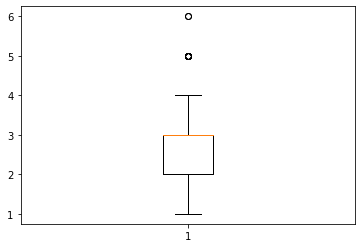

In [15]:
# Outlier treatment for Bedrooms
plt.boxplot(housingDS.bedrooms)
Q1 = housingDS.bedrooms.quantile(0.25)
Q3 = housingDS.bedrooms.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.bedrooms >= Q1 - 1.5*IQR) & (housingDS.bedrooms <= Q3 + 1.5*IQR)]


## One-Hot Encoding

In [16]:
#One-Hot Encoding For Furnishing status


#Let's drop the first column from status df using'drop_first=True'
status = pd.get_dummies(housingDS['furnishingstatus'], drop_first = True)
housingDS.drop(['furnishingstatus'], axis = 1, inplace = True)

#Add the results to the original Housing dataframe
housingDS = pd.concat([housingDS, status], axis = 1)
housingDS.head()

#Here,the columns with categorial data are splitted into multiple columns.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
#One-Hot Encoding for Bedrooms
status.head()
status = pd.get_dummies(housingDS['bedrooms'],prefix="bedroom", prefix_sep='_', drop_first = True)
housingDS.drop(['bedrooms'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)
housingDS.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4
0,13300000,7420,2,3,1,0,0,0,1,2,1,0,0,0,0,1
1,12250000,8960,4,4,1,0,0,0,1,3,0,0,0,0,0,1
2,12250000,9960,2,2,1,0,1,0,0,2,1,1,0,0,1,0
3,12215000,7500,2,2,1,0,1,0,1,3,1,0,0,0,0,1
4,11410000,7420,1,2,1,1,1,0,1,2,0,0,0,0,0,1


In [18]:
#One-Hot Encoding For bathrooms
status.head()
status = pd.get_dummies(housingDS['bathrooms'],prefix="bathroom", prefix_sep='_', drop_first = True)
housingDS.drop(['bathrooms'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)
housingDS.head()

,price,area,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,bathroom_4
0,13300000,7420,3,1,0,0,0,1,2,1,0,0,0,0,1,1,0,0
1,12250000,8960,4,1,0,0,0,1,3,0,0,0,0,0,1,0,0,1
2,12250000,9960,2,1,0,1,0,0,2,1,1,0,0,1,0,1,0,0
3,12215000,7500,2,1,0,1,0,1,3,1,0,0,0,0,1,1,0,0
4,11410000,7420,2,1,1,1,0,1,2,0,0,0,0,0,1,0,0,0


In [19]:
#One-Hot Encoding for Stories
status.head()
status = pd.get_dummies(housingDS['stories'],prefix="stories", prefix_sep='_', drop_first = True)
housingDS.drop(['stories'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)
housingDS.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4
0,13300000,7420,1,0,0,0,1,2,1,0,0,0,0,1,1,0,0,0,1,0
1,12250000,8960,1,0,0,0,1,3,0,0,0,0,0,1,0,0,1,0,0,1
2,12250000,9960,1,0,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0
3,12215000,7500,1,0,1,0,1,3,1,0,0,0,0,1,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,2,0,0,0,0,0,1,0,0,0,1,0,0


In [20]:
#One-Hot Encoding For Parking
status.head()
status = pd.get_dummies(housingDS['parking'],prefix="parking", prefix_sep='_', drop_first = True)
housingDS.drop(['parking'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)
housingDS.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,1
4,11410000,7420,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


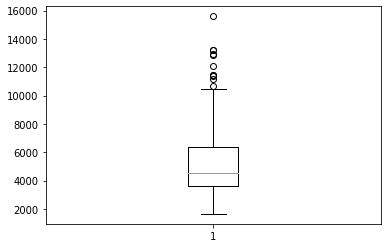

In [21]:
# outlier treatment for area
plt.boxplot(housingDS.area)
Q1 = housingDS.area.quantile(0.25)
Q3 = housingDS.area.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.area >= Q1 - 1.5*IQR) & (housingDS.area <= Q3 + 1.5*IQR)]

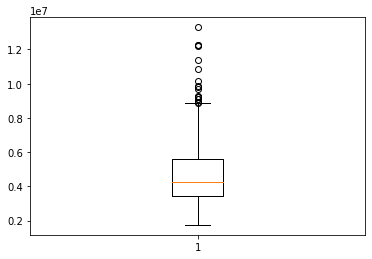

In [22]:
# outlier treatment for price
plt.boxplot(housingDS.price)
Q1 = housingDS.price.quantile(0.25)
Q3 = housingDS.price.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.price >= Q1 - 1.5*IQR) & (housingDS.price <= Q3 + 1.5*IQR)]

In [23]:
#We have removed almost all the outliers.

## Splitting data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
df=housingDS
y= df.pop('price')
x= df
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x.head()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
19,6420,1,0,0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
20,4320,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
21,7155,1,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
22,8050,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23,4560,1,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### Rescaling the Features

In [25]:
scaler = MinMaxScaler() #MinMax scaling is done so that the coefficients are become comparable at the time of model Evaluation

In [26]:
num_vars = ['area'] #Apply scaler to all columns except dummy variables
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_test[num_vars] = scaler.fit_transform(x_test[num_vars])
x_train.describe()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,...,bedroom_4,bathroom_2,bathroom_3,bathroom_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
count,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,...,404.000000,404.000000,404.000000,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.377189,0.856436,0.165842,0.35396,0.042079,0.311881,0.232673,0.440594,0.336634,0.24505,...,0.158416,0.225248,0.012376,0.0,0.418317,0.069307,0.074257,0.230198,0.188119,0.022277
std,0.211491,0.351082,0.372400,0.47879,0.201019,0.463836,0.423060,0.497074,0.473144,0.43065,...,0.365583,0.418263,0.110695,0.0,0.493894,0.254290,0.262514,0.421481,0.391292,0.147767
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218136,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.322034,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.527910,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regression Model:

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred= lm.predict(x_test)

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
117,5950000,4.314418e+06
124,5950000,6.999398e+06
516,2450000,3.017269e+06
377,3640000,4.018260e+06
434,3290000,3.345347e+06
...,...,...
81,6615000,6.015849e+06
484,2870000,2.095541e+06
85,6510000,6.864738e+06
534,2100000,2.688125e+06


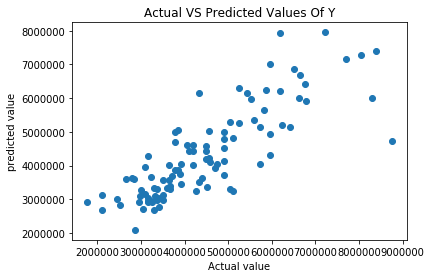

In [37]:
plt.scatter(y_test,y_pred)
plt.title('Actual VS Predicted Values Of Y')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

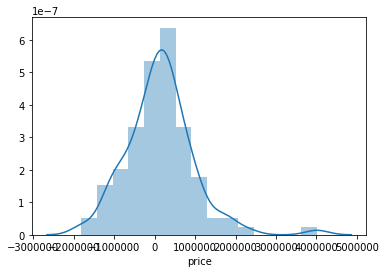

In [43]:
sns.distplot((y_test-y_pred))

## Model Evaluation

#### Calculating RMSE,REGRESSOR COEFFICIENT AND INTERCEPT

In [30]:
from sklearn.metrics import mean_squared_error 
import math 
# Calculation of Root Mean Squared Error (RMSE) 
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)),'Rs')
# Printing regressor Coefficient
print('m:',lm.coef_)
# Printing Intercept of Regression line
print('c:',lm.intercept_)

RMSE: 855552.3040466668 Rs
m: [ 1.84755173e+06  4.32180099e+05  3.59738904e+05  2.58186712e+05
  3.83522760e+05  7.19402520e+05  4.10701045e+05  8.82362620e+04
 -3.81026184e+05  6.16158161e+04  5.73631008e+05  2.83925015e+05
  8.39319496e+05  1.41762775e+06 -2.91038305e-11 -5.24122807e+04
  6.48805928e+05  1.39772448e+06  5.14524514e+05  3.34763751e+05
 -4.76317051e+05]
c: 2171696.239157444


In [31]:
x_test.columns

Index(['area', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'semi-furnished', 'unfurnished',
       'bedroom_2', 'bedroom_3', 'bedroom_4', 'bathroom_2', 'bathroom_3',
       'bathroom_4', 'stories_2', 'stories_3', 'stories_4', 'parking_1',
       'parking_2', 'parking_3'],
      dtype='object')

In [32]:
dfCoef=pd.DataFrame(lm.coef_,x_test.columns,  columns=['Coefficient'])
#dfCoef.sort_values(by=['Coefficient'], inplace=True, ascending=False)
dfCoef

,Coefficient
area,1.847552e+06
mainroad,4.321801e+05
guestroom,3.597389e+05
basement,2.581867e+05
hotwaterheating,3.835228e+05
airconditioning,7.194025e+05
prefarea,4.107010e+05
semi-furnished,8.823626e+04
unfurnished,-3.810262e+05
bedroom_2,6.161582e+04


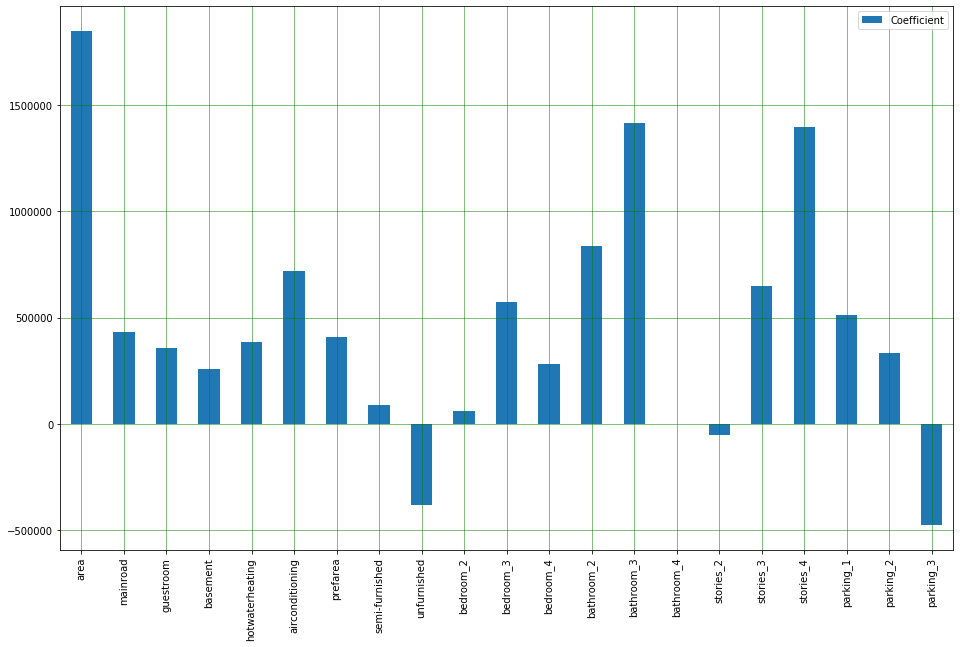

In [33]:
dfCoef.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

It shows that Area,four storey builidign,Houses having 3 bathrooms are governing the choice of an individual to buy and pays for such houses the most.however,unfurnished ,3 parkings,2 storey house are not such factors

## Actual VS Predicted Graph

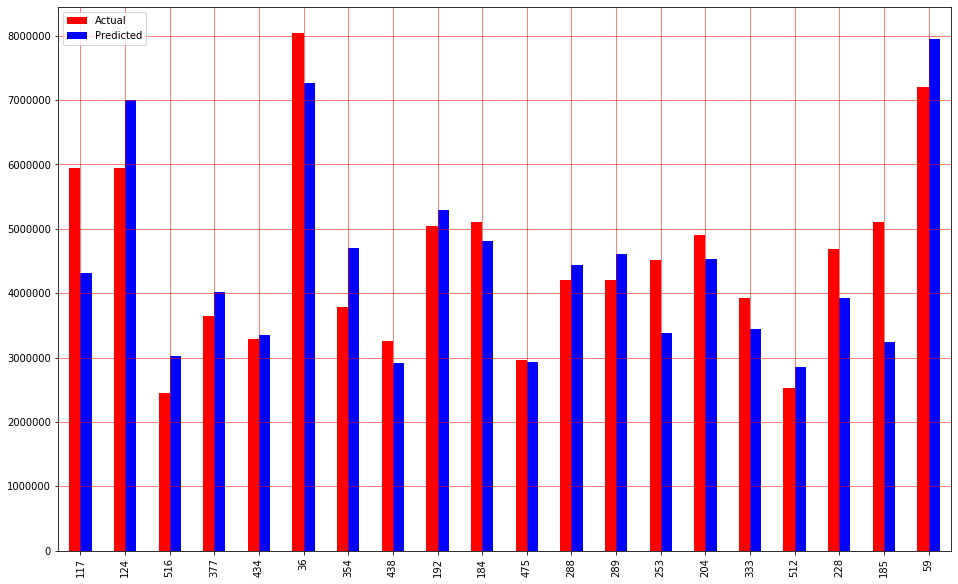

In [39]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10),color=['red','blue'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Error Treatment & Improvements if possible

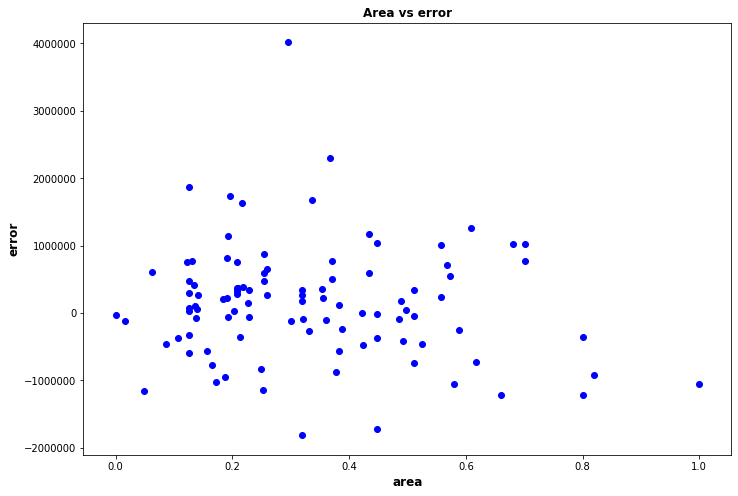

In [41]:
fig=plt.figure()
a=fig.add_axes([0.1,0.1,1.5,1.5])
a.scatter(x_test.area,y_test-y_pred,color='blue')
plt.title('Area vs error',fontweight='bold',fontsize=12)
plt.xlabel('area',fontweight='bold',fontsize=12)
plt.ylabel('error',fontweight='bold',fontsize=12)
plt.show()

CONCLUSION: The pattern observed in area vs error plot is random(no curve or staright line can help to reduce this error predominantly,i.e,we have almost grabbed most of the pattern present in the data by Linear Regression at its best
So,no further optimisation is required.

HAPPY CODING guys! ;)